In [1]:
%matplotlib inline
import glob
import h5py
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm
import skopi as sk

# SPI data

In [2]:
spi_dataset="/sdf/scratch/fpoitevi/skopi/6q5u/0.4/8.00/saveHDF5_parallel.h5"
spi_data = h5py.File(spi_dataset, 'r')
geom_path=f'{sk.__path__[0]}/../examples/input/lcls/amo86615/PNCCD::CalibV1/Camp.0:pnCCD.1/geometry/0-end.data'
det = sk.PnccdDetector(geom=geom_path)

In [3]:
spi_data.keys()

<KeysViewHDF5 ['intensities', 'orientations', 'photons', 'pixel_index_map', 'pixel_position_reciprocal', 'positions', 'volume']>

In [4]:
print(f"Number of images in dataset: {len(spi_data['photons'])}")

Number of images in dataset: 20000


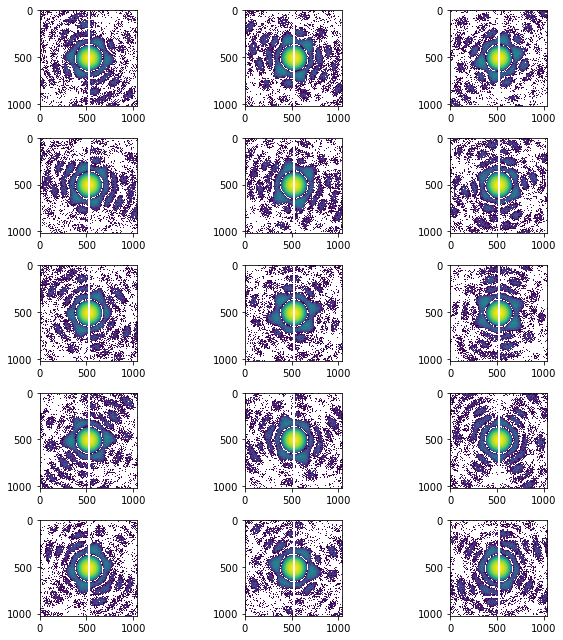

In [5]:
nrows=5
ncols=3
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(9, 9*(nrows//ncols)))
for i in range(nrows):
    for j in range(ncols):
        image = det.assemble_image_stack(spi_data['photons'][i*nrows+j])
        #title = str(spi_data['orientations'][i*nrows+j])
        #axs[i,j].set_title(title)
        axs[i,j].imshow(image, norm=LogNorm(), interpolation='none')
plt.tight_layout()

In [6]:
assembled_batch = det.assemble_image_stack_batch(spi_data['photons'][0:10])
print(assembled_batch.shape)

(10, 1024, 1040)


# cryoEM data

In [7]:
cryo_exp_dataset_dir='/sdf/group/cryoem/g/ML/vaegan/datasets/exp/20181005-rib-TEM4/Sort/'
cryo_sim_dataset_dir='/sdf/group/cryoem/g/ML/vaegan/datasets/sim/randomrot1D_nodisorder_nonoise/'

In [8]:
cryo_sim_dataset=f'{cryo_sim_dataset_dir}4v6x_randomrot_copy0_defocus1.0_no_noise.h5'
cryo_sim_data = h5py.File(cryo_sim_dataset, 'r')
cryo_sim_data.keys()

<KeysViewHDF5 ['beam', 'coordinates', 'data', 'detector', 'optics', 'particle', 'particleset', 'sample', 'simulation']>

In [9]:
print(f"Number of images in dataset: {len(cryo_sim_data['data'])}")

Number of images in dataset: 48


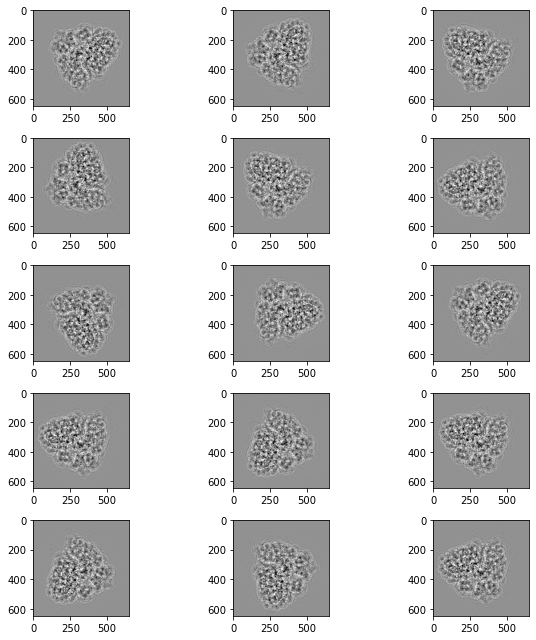

In [10]:
nrows=5
ncols=3
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(9, 9*(nrows//ncols)))
for i in range(nrows):
    for j in range(ncols):
        image = cryo_sim_data['data'][i*nrows+j]
        axs[i,j].imshow(image, interpolation='none', cmap='Greys_r')
plt.tight_layout()

In [11]:
cryo_exp_dataset=f'{cryo_exp_dataset_dir}refine3D_180x180_sort.h5'
cryo_exp_data = h5py.File(cryo_exp_dataset, 'r')
cryo_exp_data.keys()

<KeysViewHDF5 ['_rlnamplitudecontrast', '_rlnanglepsi', '_rlnanglerot', '_rlnangletilt', '_rlnautopickfigureofmerit', '_rlnclassnumber', '_rlncoordinatex', '_rlncoordinatey', '_rlnctfbfactor', '_rlnctffigureofmerit', '_rlnctfmaxresolution', '_rlnctfscalefactor', '_rlndefocusangle', '_rlndefocusu', '_rlndefocusv', '_rlndetectorpixelsize', '_rlngroupnumber', '_rlnimagename', '_rlnloglikelicontribution', '_rlnmagnification', '_rlnmaxvalueprobdistribution', '_rlnmicrographname', '_rlnnormcorrection', '_rlnnrofsignificantsamples', '_rlnoriginx', '_rlnoriginy', '_rlnparticleselectzscore', '_rlnphaseshift', '_rlnrandomsubset', '_rlnsphericalaberration', '_rlnvoltage', 'particles']>

In [12]:
print(f"Number of images in dataset: {len(cryo_exp_data['particles'])}")

Number of images in dataset: 20000


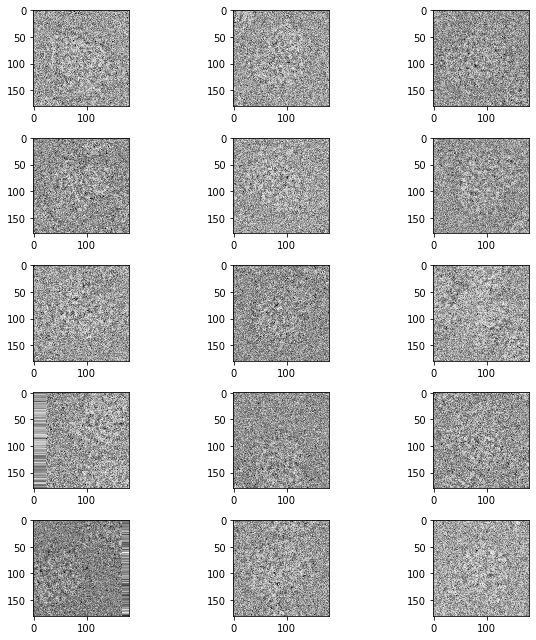

In [13]:
nrows=5
ncols=3
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(9, 9*(nrows//ncols)))
for i in range(nrows):
    for j in range(ncols):
        image = cryo_exp_data['particles'][i*nrows+j]
        axs[i,j].imshow(image, interpolation='none', cmap='Greys_r')
plt.tight_layout()